In [6]:
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize
from approximation.paa import PAA
from discretization.sax.extended_sax import ExtendedSAX
from discretization.symbol_mapping import MeanValuePoints

In [7]:
path = "../../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# do not show labels of time series and concatenate to one dataframe, because all time series have same length
df = pd.concat([df["signal"].to_frame() for df in df_list], axis=1)

# cut off some columns for a short representation
df_short = df.iloc[:,:2]
df_short

,signal,signal
0,2.21493,1.87201
1,2.05051,1.72637
2,1.84235,1.57364
3,1.63590,1.39690
4,1.43259,1.25221
...,...,...
123,1.33993,1.15807
124,1.54185,1.30960
125,1.75360,1.49456
126,1.96243,1.65084


In [3]:
df_norm = z_normalize(df_short)

In [4]:
paa = PAA(window_size=5)
df_paa = paa.transform(df_norm)

### Extended SAX Transformation

In [5]:
e_sax = ExtendedSAX(alphabet_size=5)
df_e_sax, df_sax_mean, df_sax_max, df_sax_min = e_sax.transform(df_paa, df_norm, window_size=paa.window_size)
df_e_sax

,0,1
0,eee,eee
1,eed,edd
2,ddc,ddc
3,cbb,ccc
4,bbb,ccb
5,baa,bbb
6,aaa,baa
7,aaa,aaa
8,aab,aaa
9,bbc,abb


### Extended SAX Inverse Transformation

In [6]:
symbol_mapping = MeanValuePoints(df_norm)
df_inv_e_sax = e_sax.inv_transform(df_sax_mean, df_sax_max, df_sax_min, df_norm.shape[0], paa.window_size, symbol_mapping_mean=symbol_mapping)
df_inv_e_sax

,0,1
0,1.507132,1.416357
1,1.507132,1.416357
2,1.507132,1.416357
3,1.507132,1.416357
4,1.507132,1.416357
...,...,...
123,1.507132,1.416357
124,1.507132,1.416357
125,1.507132,1.416357
126,1.507132,1.416357


<AxesSubplot: >

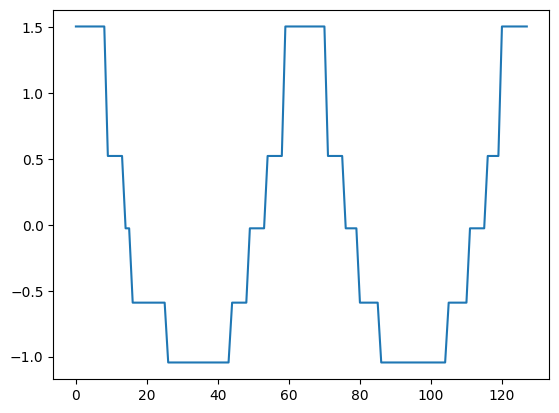

In [7]:
df_inv_e_sax.iloc[:, 0].plot()

<AxesSubplot: >

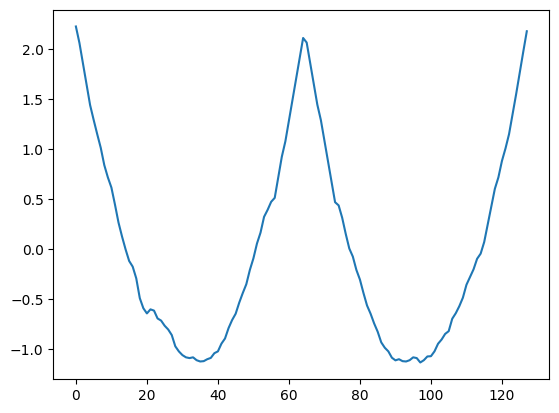

In [8]:
df_norm.iloc[:,0].plot()